In [1]:
from envs import ResourcesEnv
import gymnasium as gym
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import time

2023-11-03 22:27:18.439063: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 22:27:18.439091: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 22:27:18.439110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 22:27:18.443760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
env = ResourcesEnv(render_mode="human")

In [3]:
model = A2C('MlpPolicy', env, verbose=1)
#model = PPO.load("Model_2.zip", env=env, verbose=1)
#model = A2C.load("Model_3.zip", env=env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
model.learn(total_timesteps=200000)

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 70.7      |
|    ep_rew_mean        | -1.42e+05 |
| time/                 |           |
|    fps                | 330       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -4.2      |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 20099     |
|    policy_loss        | -4.87e+04 |
|    value_loss         | 1.11e+08  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 70.1      |
|    ep_rew_mean        | -1.27e+05 |
| time/                 |           |
|    fps                | 330       |
|    iterations         | 200       |
|    time_elapsed       | 3         |
|    total_timesteps    | 1000      |
| train/    

In [12]:
episodes = 1
total_reward = []
for ep in range(episodes):
    obs = env.reset()[0]
    done = False
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info, _ = env.step(action)
        total_reward.append(reward)
        env.render()

Text(0.5, 1.0, 'Reward in one episode')

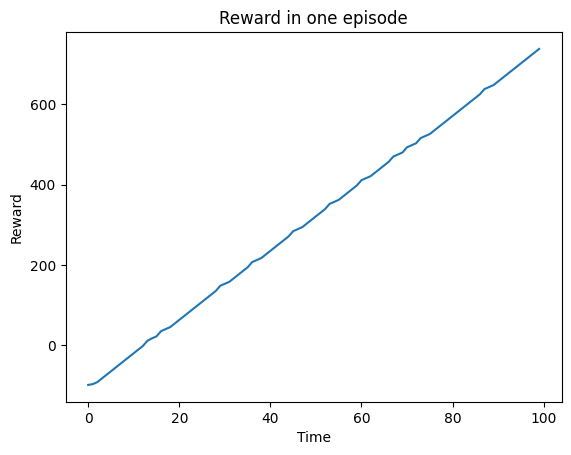

In [15]:
import matplotlib.pyplot as plt
plt.plot(total_reward)
plt.xlabel("Time")
plt.ylabel("Reward")
plt.title("Reward in one episode")

In [6]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)

In [14]:
model.save("Model_main")